#### Backtracking

Imagine we’re planning an exciting road trip through a city, aiming to visit all the places we want to see while covering the shortest distance possible. However, there are some conditions we must follow: we can’t revisit the same place more than once, and we must end up back where we started. This problem, known as the city road trip problem, requires finding the optimal route that satisfies these conditions. It’s a classic example where the concept of backtracking comes into play, allowing us to explore different paths until we find the shortest one that fulfills all the conditions.

Let’s first see how this problem can be solved using a brute-force approach. We can do this by exploring routes in every single way we can visit the places. We have to write down every possible route, check how long each one is, and then pick the shortest one. But as our list of places grows, it makes this approach computationally impractical for a large number of routes.

Now, let’s look at a backtracking approach to solve the same problem. With backtracking, we can start by picking a place and choose the next place to visit that’s close and follows our conditions. We move back (backtrack) to the previous place if the current place has been visited before or if we cannot move forward to any place from here. We check these conditions on each of our choices because we do not want to break any of our road trip rules. We keep doing this, choosing, checking conditions, and backtracking until we’ve visited all the places according to the requirements. At every step, we choose the closest place, ensuring we have chosen the shortest path to visit all the places we want to see.

Backtracking is an algorithmic technique for solving problems by incrementally constructing choices to the solutions. We abandon choices as soon as it is determined that the choice cannot lead to a feasible solution. On the other side, brute-force approaches attempt to evaluate all possible solutions to select the required one. Backtracking avoids the computational cost of generating and testing all possible solutions. This makes backtracking a more efficient approach. Backtracking also offers efficiency improvements over brute-force methods by applying constraints at each step to prune non-viable paths.

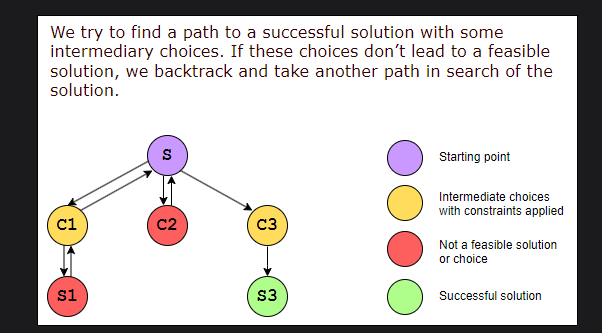

In the visualization above, we start with an initial point, 
S
. From this point, we proceed to explore a potential solution, 
S1
, via an intermediate choice, 
C1
. After evaluating, we determine that 
S1
 does not satisfactorily solve our problem. Therefore, we backtrack to 
S
 and then shift our exploration towards another potential choice, 
C2
. This process of exploration and backtracking continues until we identify a successful feasible solution.
In the scenario above, both 
S1
 and 
C2
 fail to provide feasible solutions and only 
S3
 emerges as a successful solution to the problem. This illustrates that the backtracking approach examines all potential combinations until it discovers a successful feasible solution.

The backtracking algorithm can be implemented using recursion. We use recursive calls where each call attempts to move closer towards a feasible solution. This can be outlined as follows after starting from the initial point as the current point:


1. Step 1: If the current point represents a feasible solution, declare success and terminate the search.

2. Step 2: If all paths from the current point have been explored (i.e., the current point is a dead-end) without finding a feasible solution, backtrack to the previous point.

3. Step 3: If the current point is not a dead-end, keep progressing towards the solution, and reiterate all the steps until a solution is found or all possibilities are exhausted.


#### E.G.
1. Path in binary matrix: Find a path of 1s from top-left to bottom-right in an 
n×n
 binary maze. We are only allowed to move to the right or downward.



#### Ideal application
 Yes, if any of these conditions is fulfilled:

Complete exploration is needed for any feasible solution: The problem requires considering every possible choice to find any feasible solution.

Selecting the best feasible solution: When the goal is not just to find any feasible solution but to find the best one among all feasible solutions.

No, if the following condition is fulfilled:

Solution invalidity disqualifies other choices: In problems where failing to meet specific conditions instantly rules out all other options, backtracking might not add value.

#### Applications
Syntax analysis: In compilers, we use recursive descent parsing. It is a form of backtracking, to analyze the syntax of the program. This analysis involves matching the sequence of tokens (basic symbols of programming language) against the grammar rules of the language. When a mismatch occurs during the analysis, the parser backtracks to a previous point to try a different rule of the grammar. This ensures that even complex nested structures can be accurately understood and compiled.

Game AI (Artificial Intelligence): In games like chess or Go, AI algorithms use backtracking to try out different moves and see what happens. If a move doesn’t work out well, the AI goes back and tries something else. This helps the AI learn strategies that might be better than those used by humans because it can think about lots of different moves and figure out which ones are likely to work best.

Pathfinding algorithms: In pathfinding problems like finding the way through a maze or routing in a network, backtracking is used. It tries out different paths to reach the destination. If it hits a dead end or a spot it can’t pass through, it goes back and tries another path. This keeps happening until it finds a path that works and leads to the destination.

#### Q1

N-Queens. LC 51

In [15]:
from typing import List
class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        results = []

        def create_board(state):
            '''
            Given state, create one list of result
            ['.q..', ...]
            '''
            one_result = []
            for row in state:
                one_result.append("".join(row))
            return one_result
            
        def backtracking(state,row,cols,diags,anti_diags):
            '''
            state is the chessboard configuration
            row is current traverse row
            cols: cols that are not available for queen to move
            diags: queen cannot move to here due to diags limitation
            anti-diags: similar to diags
            '''

            # check if it's out of bound
            if row > n -1:
                # already finish traversing the last row
                # append result
                results.append(create_board(state))
                # end current step and return to previous state
                return
            
            # if not the last row, traverse columns to pick up queen
            # need to pass condition
            for col in range(n):
                diag = col -  row
                anti_diag = col + row
                if col in cols or diag in diags or anti_diag in anti_diags:
                    continue
                
                # find an appropriate queen position
                state[row][col] = "Q"
                # update filtering criteria
                cols.add(col)
                diags.add(diag)
                anti_diags.add(anti_diag)
                # continue the chain and find the path
                backtracking(state,row+1,cols,diags,anti_diags)

                # now if backtracking finished, update current status and conintue traversing the column
                cols.remove(col)
                diags.remove(diag)
                anti_diags.remove(anti_diag)
                state[row][col] = '.'
        
        # state initialization
        state = [['.']*n for _ in range(n)]
        backtracking(state,0,set(),set(),set())
        return results






#### Q2 Word Search

Given an 
m×n
 2D grid of characters and word as a string, we need to determine if the word can be constructed from letters of sequentially adjacent cells. The cells are considered sequentially adjacent when they are neighbors to each other either horizontally or vertically. The function should return TRUE if the word can be constructed and FALSE otherwise.

In [28]:
# my own solution, which I think needs optimization
# a more memory efficient solution is to manipuate the board directly

class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        # need a set to save tuple of visited ij
        # need a number to track length of string accumulated
        nrows = len(board)
        ncols = len(board[0])

        def check_current(visited_ij,i,j,target_char):
            coord = (i,j)
            if coord not in visited_ij:
                if board[i][j] == target_char:
                    return True
        
        def backtrack(ptr_word,i,j,visited_ij):        
            # check condition satisfied scenario
            # if ptr_word == len(word):
            #     return True
            
            # if current indices doesn't match with target char, end current function
            if not check_current(visited_ij,i,j,word[ptr_word]):
                return False
            
            # current location match with words
            # check as visited
            visited_ij.add((i,j))

            # if already the last case
            if ptr_word == len(word) - 1:
                if board[i][j] == word[ptr_word]:
                    return True

            # traverse neighbor and increase ptr
            neighbor_idx = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]

            for neighbor_i,neighbor_j in neighbor_idx:
                # check boundary
                if neighbor_i < 0 or neighbor_i>nrows-1 or neighbor_j<0 or neighbor_j>ncols-1:
                    continue
                
                # if inside boundary, keep tracking the word patterns
                if backtrack(ptr_word+1,neighbor_i,neighbor_j,visited_ij):
                    return True
            
            # after searching, if doesn't find pattern matching, then 
            # remove current node visited_ij and back to previous step
            visited_ij.remove((i,j))
            return False
    
        # traverse
        for row in range(nrows):
            for col in range(ncols):
                if backtrack(0,row,col,set()):
                    return True
        
        return False
            

        

In [1]:
def word_search(grid,key_word):
    nrows = len(grid)
    ncols = len(grid[0])

    # try to do a dfs search for every node

    for i in range(nrows):
        for j in range(ncols):
            if dfs(grid,i,j,key_word,index_match=0):
                return True
    
    return False


def dfs(grid,i,j,key_word,index_match):
    # if current element doesn't match with key word
    # return False and end current stack
    if grid[i][j] != key_word[index_match]:
        return False
    

    # if matched, need to check whether i,j is inside the bounds
    if i < 0 or i >= len(grid) or j < 0 or j >= len(grid[0]):
        return False


    # if matched, see if we are at the end of the key word
    # if current word matches with key word
    # and we are at the end of the key word
    # return True
    if index_match == len(key_word)-1:
        return True

    # if not: search neighbor
    temp = grid[i][j] # temp serves as a placeholder for the current element
    grid[i][j] = None

    for search_i, search_j in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]:
        if dfs(grid, search_i, search_j, key_word, index_match+1):
            return True
    
    grid[i][j] = temp
    return False
    


#### Q2

Given that a string, s, contains digits, return a list of all possible valid IP addresses that can be obtained from the string.

A valid IP address is made up of four numbers separated by dots ., for example, 
255.255.255.123
255.255.255.123
. Each number falls between 
0
 and 
255
 (including 
0
 and 
255
), and none of them can have leading zeros.


The input string s consists of digits only.

4≤
 s.length 
≤12


In [2]:
def restore_ip_addresses(s):
    ip_address_list = []

    len_s = len(s)

    for location in range(len_s):
        candidate_string = s[location]
        all_str = s[location]
        # check every character as the start of the ip address
        dfs(s,location,ip_address_list,candidate_string,all_str)
    
    return ip_address_list


def valid_ip_single(candidate_string):
    # candidate string is a single character
    if len(candidate_string) > 3:
        return False
    if candidate_string[0] == '0' and len(candidate_string) > 1:
        return False
    if int(candidate_string) > 255:
        return False

    return True



def valid_ip_all(all_str):
    # check how many dots
    all_str = all_str.split('.')
    if len(all_str) != 4:
        return False
    for candidate_string in all_str:
        if not valid_ip_single(candidate_string):
            return False
    return True


def dfs(s,location,ip_address_list,candidate_string,all_str):
    # if candidate str is not valid ip address, return False
    if not valid_ip_single(candidate_string):
        return False

    # if a ip address sucessfully found, add it to the list
    # end current function
    if valid_ip_all(all_str):
        ip_address_list.append(all_str)
        # TODO should I return False?

        # check if candidate string is the last one
        # if it is, return False
        if location == len(s)-1:
            return False
    
    else:
        # two ways
        ###### first - add current character to all str with sentence #####
        # move candidate string to next character
        all_str_input = all_str + candidate_string + '.'
        candidate_string_input = s[location+1]
        dfs(s,location+1,ip_address_list,candidate_string_input,all_str_input)

        
        # second - add current character to candidate string
        candidate_string_input += s[location+1]
        all_str_input = all_str
        dfs(s,location+1,ip_address_list,candidate_string_input,all_str_input)
    
    return False




    




    
    

    



In [3]:
def restore_ip_addresses(s):
    ip_address_list = []
    dfs(s, 0, [], ip_address_list)
    return ip_address_list

def valid_ip_single(candidate_string):
    # candidate string is a single character or valid segment
    if len(candidate_string) > 3:
        return False
    if candidate_string[0] == '0' and len(candidate_string) > 1:
        return False
    if int(candidate_string) > 255:
        return False
    return True

def dfs(s, start, path, ip_address_list):
    # If we have 4 parts and we are at the end of the string
    if len(path) == 4 and start == len(s):
        ip_address_list.append('.'.join(path))
        return
    # If we have 4 parts but not at the end of the string, return
    if len(path) == 4:
        return

    for i in range(1, 4): # The segment length can be 1, 2, or 3
        if start + i > len(s):
            break
        segment = s[start:start + i]
        if valid_ip_single(segment):
            dfs(s, start + i, path + [segment], ip_address_list)

# Example usage
s = "25525511135"
print(restore_ip_addresses(s))

['255.255.11.135', '255.255.111.35']


In [4]:
def valid(segment):
    segment_length = len(segment)
    if segment_length > 3:
        return False

    return int(segment) <= 255 if segment[0] != '0' else len(segment) == 1


# this function will append the current list of segments to the list of results.
def update_segment(s, curr_dot, segments, result):
    segment = s[curr_dot + 1:len(s)]

    if valid(segment): 
        segments.append(segment)
        result.append('.'.join(segments))
        segments.pop() 


def backtrack(s, prev_dot, dots, segments, result):

    size = len(s)

    for curr_dot in range(prev_dot + 1, min(size - 1, prev_dot + 4)):
        segment = s[prev_dot + 1:curr_dot + 1]
        if valid(segment):
            segments.append(segment)

            if dots - 1 == 0:
                update_segment(s, curr_dot, segments, result)
            else:
                backtrack(s, curr_dot, dots - 1, segments, result)

            segments.pop()


def restore_ip_addresses(s):

    result, segments = [], []
    backtrack(s, -1, 3, segments, result)
    return result


# driver code
def main():
    ip_addresses = ["0000", "25525511135", "12121212",
                    "113242124", "199219239", "121212", "25525511335"]

    for i in range(len(ip_addresses)):
        print(i + 1, ".\t Input addresses: '", ip_addresses[i], "'", sep="")
        print("\t Possible valid IP Addresses are: ",
              restore_ip_addresses(ip_addresses[i]), sep="")
        print("-" * 100)


if __name__ == '__main__':
    main()

1.	 Input addresses: '0000'
	 Possible valid IP Addresses are: ['0.0.0.0']
----------------------------------------------------------------------------------------------------
2.	 Input addresses: '25525511135'
	 Possible valid IP Addresses are: ['255.255.11.135', '255.255.111.35']
----------------------------------------------------------------------------------------------------
3.	 Input addresses: '12121212'
	 Possible valid IP Addresses are: ['1.2.121.212', '1.21.21.212', '1.21.212.12', '1.212.1.212', '1.212.12.12', '1.212.121.2', '12.1.21.212', '12.1.212.12', '12.12.1.212', '12.12.12.12', '12.12.121.2', '12.121.2.12', '12.121.21.2', '121.2.1.212', '121.2.12.12', '121.2.121.2', '121.21.2.12', '121.21.21.2', '121.212.1.2']
----------------------------------------------------------------------------------------------------
4.	 Input addresses: '113242124'
	 Possible valid IP Addresses are: ['1.13.242.124', '1.132.42.124', '11.3.242.124', '11.32.42.124', '113.2.42.124', '113.24.2.124